In [1]:
import warnings;
warnings.simplefilter('ignore')

# Install Dependencies

In [3]:
!pip install cmdstanpy prophet plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 50.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
from prophet import Prophet

# Load in dataset

In [5]:
df = pd.read_csv('dataset.csv')

In [6]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


# Summary Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time Date  1080 non-null   int64  
 1   Product    1080 non-null   int64  
 2   Store      1080 non-null   object 
 3   Value      1080 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.9+ KB


We see that the Time Date column is an integer data type, but it should be a datatime

In [8]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [10]:
# Checking uniqueness as Prophet needs to have 2 columns
# Verifying that there is only one product and one store, otherwise we would need to parse the dataset
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


# Data Preprocessing

In [12]:
# Parsing the string column of Time Date to create a dates column
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['dates'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [13]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,dates
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [14]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
dates        datetime64[ns]
dtype: object

We can see now that the new dates column is of datetime64[ns] datatype

In [15]:
# Dropping unneeded columns
df.drop(columns=['Product', 'Store', 'Year', 'Month', 'Day', 'Time Date'], axis=1, inplace=True)

In [16]:
# Renaming the columns to y and ds
df.columns = ['y', 'ds']

# Train Model

In [17]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

10:34:03 - cmdstanpy - INFO - Chain [1] start processing
10:34:04 - cmdstanpy - INFO - Chain [1] done processing


# Make Predictions

In [18]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.689704,921.958284,3958.373706,3041.689704,3041.689704,-642.043293,-642.043293,-642.043293,468.569986,...,16.627334,16.627334,16.627334,-1127.240613,-1127.240613,-1127.240613,0.0,0.0,0.0,2399.646411
1,2018-01-02,3042.449564,812.342040,3865.751309,3042.449564,3042.449564,-652.191387,-652.191387,-652.191387,468.569986,...,-11.269989,-11.269989,-11.269989,-1109.491384,-1109.491384,-1109.491384,0.0,0.0,0.0,2390.258177
2,2018-01-03,3043.209424,808.679326,4126.490479,3043.209424,3043.209424,-626.373366,-626.373366,-626.373366,468.569986,...,-4.392342,-4.392342,-4.392342,-1090.551010,-1090.551010,-1090.551010,0.0,0.0,0.0,2416.836058
3,2018-01-04,3043.969283,859.281219,4087.672014,3043.969283,3043.969283,-579.460690,-579.460690,-579.460690,468.569986,...,22.465599,22.465599,22.465599,-1070.496276,-1070.496276,-1070.496276,0.0,0.0,0.0,2464.508593
4,2018-01-05,3044.729143,867.905879,4128.433513,3044.729143,3044.729143,-615.474741,-615.474741,-615.474741,468.569986,...,-34.587957,-34.587957,-34.587957,-1049.456770,-1049.456770,-1049.456770,0.0,0.0,0.0,2429.254402


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4235.667647,2123.649151,5218.555033,4232.627688,4238.912812,-514.572606,-514.572606,-514.572606,468.569986,...,16.627334,16.627334,16.627334,-999.769926,-999.769926,-999.769926,0.0,0.0,0.0,3721.095041
1176,2021-03-23,4236.736783,2175.579204,5409.157100,4233.647015,4240.024990,-532.014616,-532.014616,-532.014616,468.569986,...,-11.269989,-11.269989,-11.269989,-989.314613,-989.314613,-989.314613,0.0,0.0,0.0,3704.722168
1177,2021-03-24,4237.805919,2191.962400,5293.300263,4234.686039,4241.137168,-517.459770,-517.459770,-517.459770,468.569986,...,-4.392342,-4.392342,-4.392342,-981.637414,-981.637414,-981.637414,0.0,0.0,0.0,3720.346149
1178,2021-03-25,4238.875055,2297.872457,5293.691738,4235.725063,4242.249345,-486.286042,-486.286042,-486.286042,468.569986,...,22.465599,22.465599,22.465599,-977.321628,-977.321628,-977.321628,0.0,0.0,0.0,3752.589013
1179,2021-03-26,4239.944191,2110.185190,5301.513632,4236.764087,4243.360837,-542.883552,-542.883552,-542.883552,468.569986,...,-34.587957,-34.587957,-34.587957,-976.865581,-976.865581,-976.865581,0.0,0.0,0.0,3697.060639


# Plot Predictions

/Users/fecondon/Documents/DataScience/venviron/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/fecondon/Documents/DataScience/venviron/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


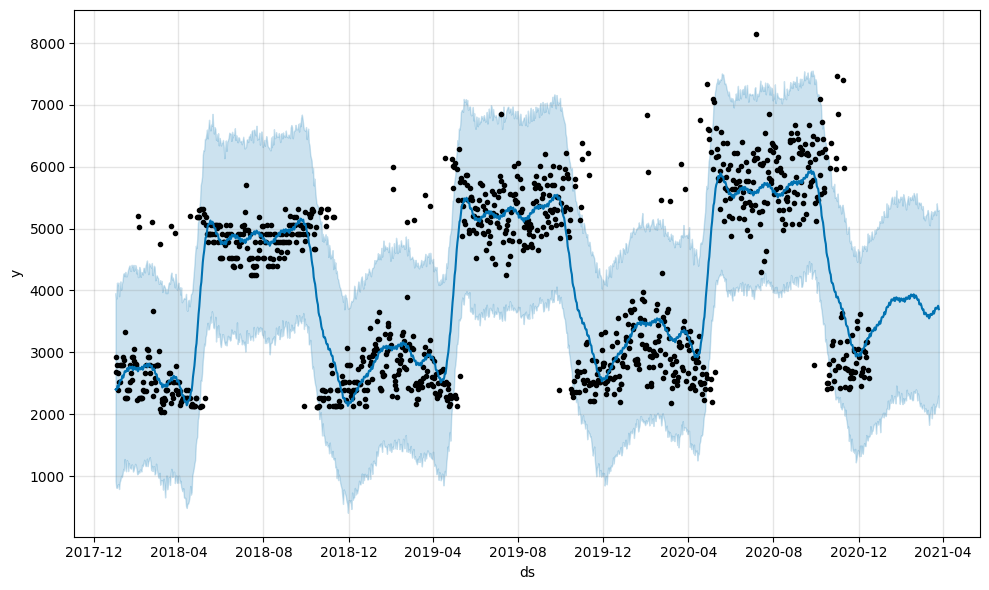

In [20]:
plot1 = m.plot(forecast)

/Users/fecondon/Documents/DataScience/venviron/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/fecondon/Documents/DataScience/venviron/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/fecondon/Documents/DataScience/venviron/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

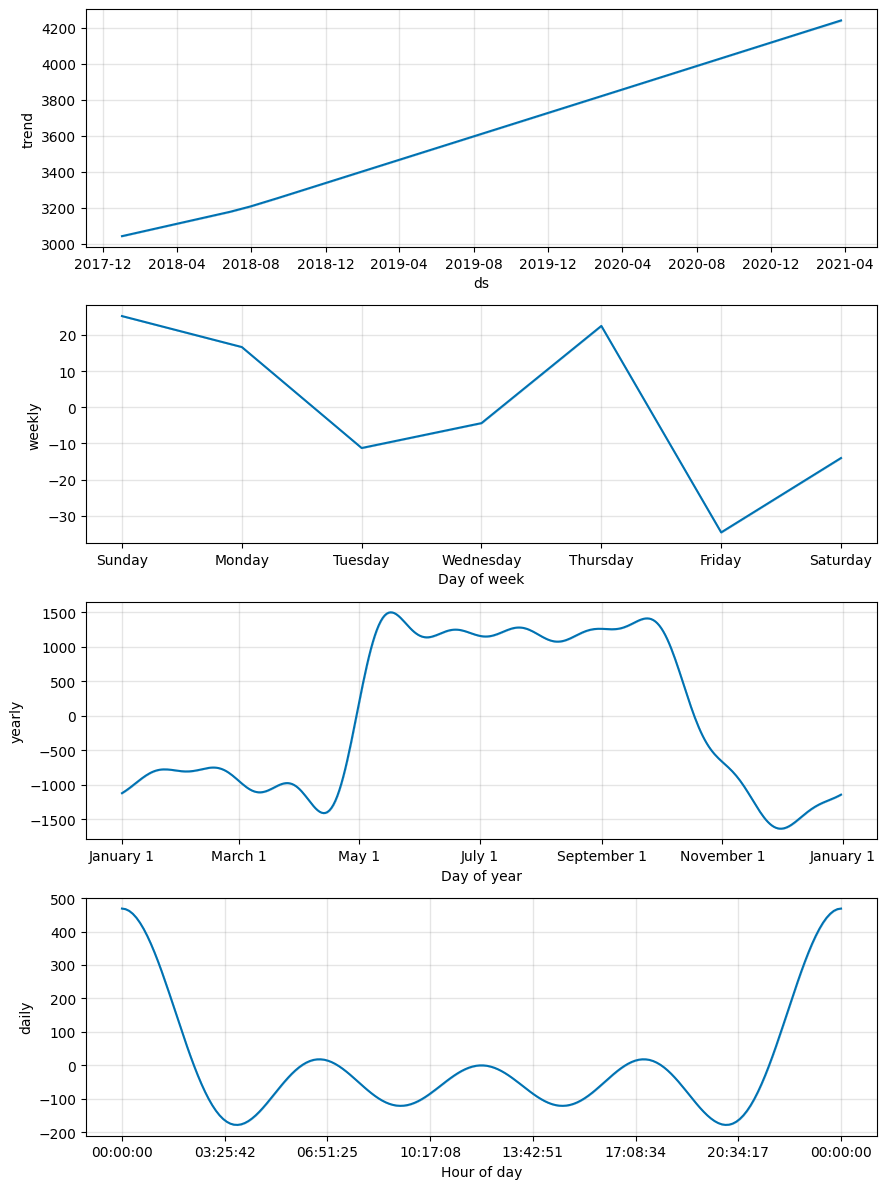

In [21]:
plot2 = m.plot_components(forecast)